# Проект: Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Требуется провести маркетинговую аналитику развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

   * лог сервера с данными об их посещениях,
   *  выгрузка их покупок за этот период,
   *  рекламные расходы.
   
**Предстоит изучить:**

   *  откуда приходят пользователи и какими устройствами они пользуются,
   *  сколько стоит привлечение пользователей из различных рекламных каналов;
   *  сколько денег приносит каждый клиент,
   *  когда расходы на привлечение клиента окупаются,
   *  какие факторы мешают привлечению клиентов.
   
**Описание данных:**

visits_info_short.csv:

* User Id — уникальный идентификатор пользователя
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии


Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.


Структура costs_info_short.csv

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.
   
**Цель:**

   * Разобраться в причинах убытков компании.
   
**Этапы:**

   * Предобработка данных.
   * Ислледовательский анализ.
   * Анализ маркетинга.
   * Оценка окупаемости рекламы.


### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [2]:

visits = pd.read_csv('/datasets/visits_info_short.csv')
purchases = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков не обнаружено, нужно проверить соответсвие типа данных

In [6]:
display(visits.isna().sum())
display(purchases.isna().sum())
display(costs.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

Пропусков по столбцам тоже нет, но видем несоответствие по стандарту названия столбцов.


In [7]:
display(visits.duplicated().sum())
display(purchases.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Полные дубликаты по 3 датафреймам отсутствуют.

In [8]:
visits.rename(columns={'User Id':'user_id','Region':'region','Device':'device',
                      'Channel':'channel','Session Start':'session_start','Session End':'session_end'}, inplace = True )


In [9]:
purchases.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'}, inplace = True )

In [10]:
costs.rename(columns={'Channel':'channel'}, inplace = True )

Проверим все столбцы содержащией даты.

In [11]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])

In [12]:
purchases['event_dt']=pd.to_datetime(purchases['event_dt'])

In [13]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Вывод по 1 шагу:

* Пропуски отсутсвуют.

* Полные дубликаты отсутсвуют.

* Регистр столбцов приведен к общему виду.

* Столбцы с временными данными приведены к нужному дата типу.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция get_profiles()**

In [14]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**Функция get_retention()**

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция get_conversion()**

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция get_ltv()**

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функция filter_data()**

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Функция plot_retention()**

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Фукнция plot_conversion()**

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Функция plot_ltv_roi()**

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод по шагу 2:**

* Функции профилей заданы.

* Функции графиков заданы.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [22]:
profiles = get_profiles(visits,purchases,costs)

In [23]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Минимальная и максимальная даты привлечения пользователей

In [24]:
# Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
observation_date = datetime(2019, 11, 4).date()

In [25]:
horizon_days = 14

In [26]:
min_date_attraction = profiles['dt'].min()
min_date_attraction

datetime.date(2019, 5, 1)

In [27]:
max_date_attraction = profiles['dt'].max()
max_date_attraction

datetime.date(2019, 10, 27)

**Вывод:**

* Минимальная дата привлечения - 01.05.2019

* Максимальная дата привлечения - 27.10.2019

#### Статистика

In [28]:
df_region_attraction = profiles.pivot_table(index = 'region', values = ('user_id','payer'), 
                                     aggfunc = ({'user_id': len ,'payer': sum,})).sort_values(by='region',ascending=True)
df_region_attraction['ratio'] = df_region_attraction['payer'] / df_region_attraction['user_id']
df_region_attraction.rename(columns={'user_id':'users','payer':'paying_users'}, inplace = True )
df_region_attraction = df_region_attraction.style.format({'ratio': "{:.2%}"})
df_region_attraction

,paying_users,users,ratio
region,,,
France,663,17450,3.80%
Germany,616,14981,4.11%
UK,700,17575,3.98%
United States,6902,100002,6.90%


**Вывод:**

* Основная масса пользователей из США - 100'002; Доля платящих 6.9%

* Франция 17'450 пользователей; Доля платящих 3.8%

* Германия 14'981 пользователей. Доля платящих 4.11%

* Великобритания 17'575 пользователей. Доля платящих 3.98%

In [29]:
df_device = profiles.pivot_table(index = 'device', values = ('user_id','payer'), 
                                     aggfunc = ({'user_id': len ,'payer': sum,})).sort_values(by='device',ascending=True)
df_device['ratio'] = df_device['payer'] / df_device['user_id']
df_device.rename(columns={'user_id':'users','payer':'paying_users'}, inplace = True )
df_device = df_device.style.format({'ratio': "{:.2%}"})
df_device

,paying_users,users,ratio
device,,,
Android,2050,35032,5.85%
Mac,1912,30042,6.36%
PC,1537,30455,5.05%
iPhone,3382,54479,6.21%


**Вывод:**

* Android - 35032; Доля платящих 5.85%

* Mac 30042 пользователей; Доля платящих 6.36%

* PC 30455 пользователей. Доля платящих 5.05%

* iPhone 54479 пользователей. Доля платящих 6.21%

In [30]:
df_channel_attraction = profiles.pivot_table(index = 'channel', values = ('user_id','payer'), 
                                     aggfunc = ({'user_id': len ,'payer': sum,})).sort_values(by='payer',ascending=True)
df_channel_attraction['ratio'] = df_channel_attraction['payer'] / df_channel_attraction['user_id']
df_channel_attraction.rename(columns={'user_id':'users','payer':'paying_users'}, inplace = True )
df_channel_attraction = df_channel_attraction.style.format({'ratio': "{:.2%}"})
df_channel_attraction

,paying_users,users,ratio
channel,,,
MediaTornado,156,4364,3.57%
YRabbit,165,4312,3.83%
lambdaMediaAds,225,2149,10.47%
OppleCreativeMedia,233,8605,2.71%
LeapBob,262,8553,3.06%
RocketSuperAds,352,4448,7.91%
AdNonSense,440,3880,11.34%
WahooNetBanner,453,8553,5.30%
organic,1160,56439,2.06%


**Вывод:**
Кол-во пользователей привлеченных по каналам и доля платящих:

Больше всего платящих пользователей привлек канал FaceBoom (3557)

* AdNonSense	3880 //	11.34%
* FaceBoom		29144 //	12.20%
* LeapBob		8553  //	3.06%
* MediaTornado		4364 //	3.57%
* OppleCreativeMedia		8605 //	2.71%
* RocketSuperAds		4448 //	7.91%
* TipTop		19561 //	9.60%
* WahooNetBanner		8553 //	5.30%
* YRabbit		4312 //	3.83%
* lambdaMediaAds		2149 //	10.47%
* organic		56439 //	2.06%


**Вывод по шагу 3:**

* Были выявлены максимальная и минимальная дата привлечения пользователей:
    * Минимальная дата привлечения - 01.05.2019
    * Максимальная дата привлечения - 22.10.2019 (с учетом горизонта анализа в 2 недели)
    
* Проведена статистика по регионам:
    * Основная масса пользователей из США - 100'002; Доля платящих 6.9%

    * Франция 17'450 пользователей; Доля платящих 3.8%

    * Германия 14'981 пользователей. Доля платящих 4.11%

    * Великобритания 17'575 пользователей. Доля платящих 3.98%
    
* Проведена статистика по девайсам:

    * Android - 35032; Доля платящих 5.85%

    * Mac 30042 пользователей; Доля платящих 6.36%

    * PC 30455 пользователей. Доля платящих 5.05%

    * iPhone 54479 пользователей. Доля платящих 6.21%
    
* Проведена статистика по каналам:
    * Больше всего платящих пользователей привлек канал FaceBoom (3557)
    
    * На 2 и 3 месте по привлечению стоят каналы TipTop и органичные пользователи, которые сами пришли в приложение.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [31]:
total_marketing_cost = round(profiles['acquisition_cost'].sum(),2)
total_marketing_cost

105497.3

**Вывод:**
Общая сумма затрат на маркетинг равна 105497.3

#### Затраты на каждый источник

,total_costs,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


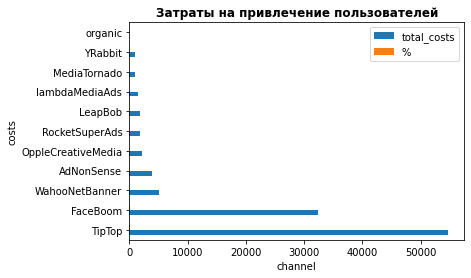

In [32]:
df_channel_costs = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', 
                                     aggfunc = sum).sort_values(by='acquisition_cost', ascending=False)
df_channel_costs.rename(columns={'acquisition_cost':'total_costs'}, inplace = True)

df_channel_costs['%'] = round(df_channel_costs['total_costs'] / df_channel_costs['total_costs'].sum() * 100 ,2)

df_channel_costs.plot (kind='barh')
plt.xlabel("channel", fontsize=10, fontweight="regular")
plt.ylabel("costs", fontsize=10, fontweight="regular")
plt.title(label='Затраты на привлечение пользователей', loc='center', fontweight="bold")
display(df_channel_costs)

#### Динамика расходов по месецам и неделям.

In [33]:
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles['month'] = profiles['dt'].dt.month
profiles['week'] = profiles['dt'].dt.isocalendar().week

In [34]:
df_costs_month = profiles.pivot_table(index='month',values='acquisition_cost',
                                     aggfunc = sum)
df_costs_month['acquisition_cost'] = round(df_costs_month['acquisition_cost'],2)

display(df_costs_month)

df_costs_week = profiles.pivot_table(index='week',values='acquisition_cost',
                                     aggfunc = sum)
df_costs_week['acquisition_cost'] = round(df_costs_week['acquisition_cost'],2)

display(df_costs_week)

,acquisition_cost
month,
5,9978.57
6,15090.04
7,16447.06
8,20657.87
9,22441.34
10,20882.41


,acquisition_cost
week,
18,1455.64
19,2031.82
20,1976.32
21,2297.12
22,3427.07
23,2915.74
24,2706.39
25,3421.39
26,4837.12


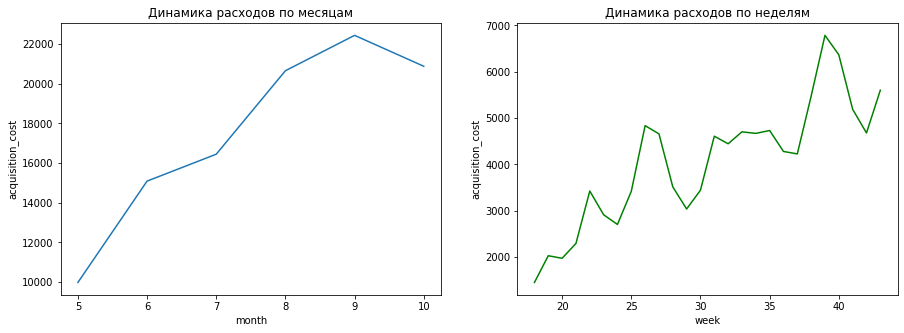

In [35]:

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(df_costs_month)
plt.title('Динамика расходов по месяцам')
plt.xlabel('month')
plt.ylabel('acquisition_cost')
 

plt.subplot(1, 2, 2)
 

plt.plot( df_costs_week, 'g')
plt.title('Динамика расходов по неделям')
plt.xlabel('week')
plt.ylabel('acquisition_cost')
plt.show()

**Вывод:**

* Динамика трат на маркетинг по месяцам пик приходился на сентябрь.

* Динамика по неделям показала пиковые точки на 27,39 неделях.

In [36]:
df_channel_month = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost',  aggfunc='sum')
df_channel_week = profiles.pivot_table(index='week', columns='channel', values='acquisition_cost',  aggfunc='sum')

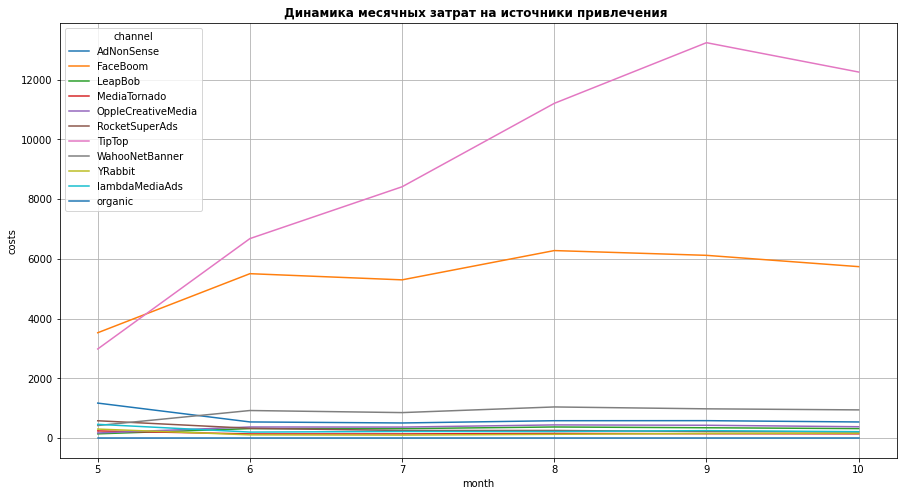

In [37]:
df_channel_month.plot(grid=True,figsize=(15,8))
plt.xlabel("month", fontsize=10, fontweight="regular")
plt.ylabel("costs", fontsize=10, fontweight="regular")
plt.title(label='Динамика месячных затрат на источники привлечения ', loc='center', fontweight="bold")
plt.show()

**Вывод:**

Траты на маркетинг повышались каждый месяц у TipTop и слабо у FaceBoom

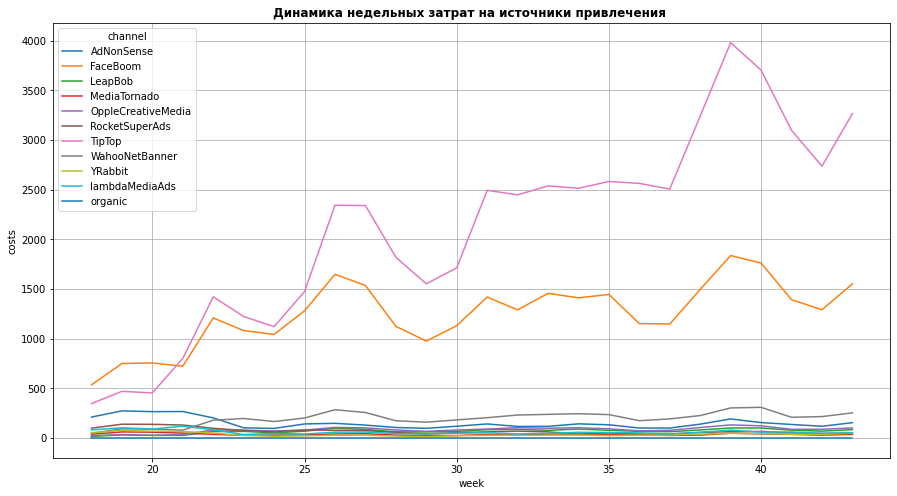

In [38]:
df_channel_week.plot(grid=True,figsize=(15,8))
plt.xlabel("week", fontsize=10, fontweight="regular")
plt.ylabel("costs", fontsize=10, fontweight="regular")
plt.title(label='Динамика недельных затрат на источники привлечения ', loc='center', fontweight="bold")
plt.show()

**Вывод:**

Траты на маркетинг повышались каждую неделю у TipTop и FaceBoom

#### CAC по источникам

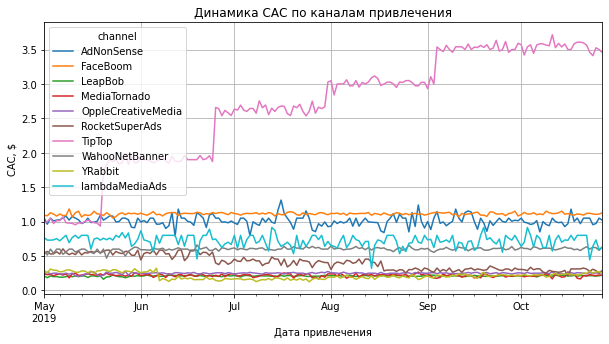

channel
AdNonSense            1.01
FaceBoom              1.11
LeapBob               0.21
MediaTornado          0.22
OppleCreativeMedia    0.25
RocketSuperAds        0.41
TipTop                2.66
WahooNetBanner        0.60
YRabbit               0.21
lambdaMediaAds        0.72
dtype: float64

Среднее CAC для всего проекта: 0.739


In [39]:
filtered_profiles = profiles.query('channel != "organic"')

cac_profiles = filtered_profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')

cac_profiles.plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

display(round(cac_profiles.mean(),2))
print('Среднее CAC для всего проекта:' ,round(cac_profiles.mean().mean(),3))


**Вывод по графику:**

* Затраты на источник TipTop росли каждый месяц, по итогу вспоминая прошлые выводы, по привлечению платных пользователей, TipTop занял 2 место.

* На остальные источники привлечения траты не заходили в среднем более 1 доллара на пользователя.

**Вывод по шагу 4:**

* Общая сумма затрат на маркетинг равна 105497.3

* Самыми затратными источниками являются TipTop, FaceBoom, WahooNetBanner

* Динамика трат показала пик на сентябре и 27,39 неделях

* Динамика CAC показывает увеличение трат каждый месяц на источник TipTop, остальные источники не выходили за порог в 1 доллар

* Среднее CAC для всего проекта: 0.672

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### LTV и ROI

In [40]:
filtered_profiles = profiles.query('channel != "organic"') #Органичные пользователи не являются показателями рекламы.

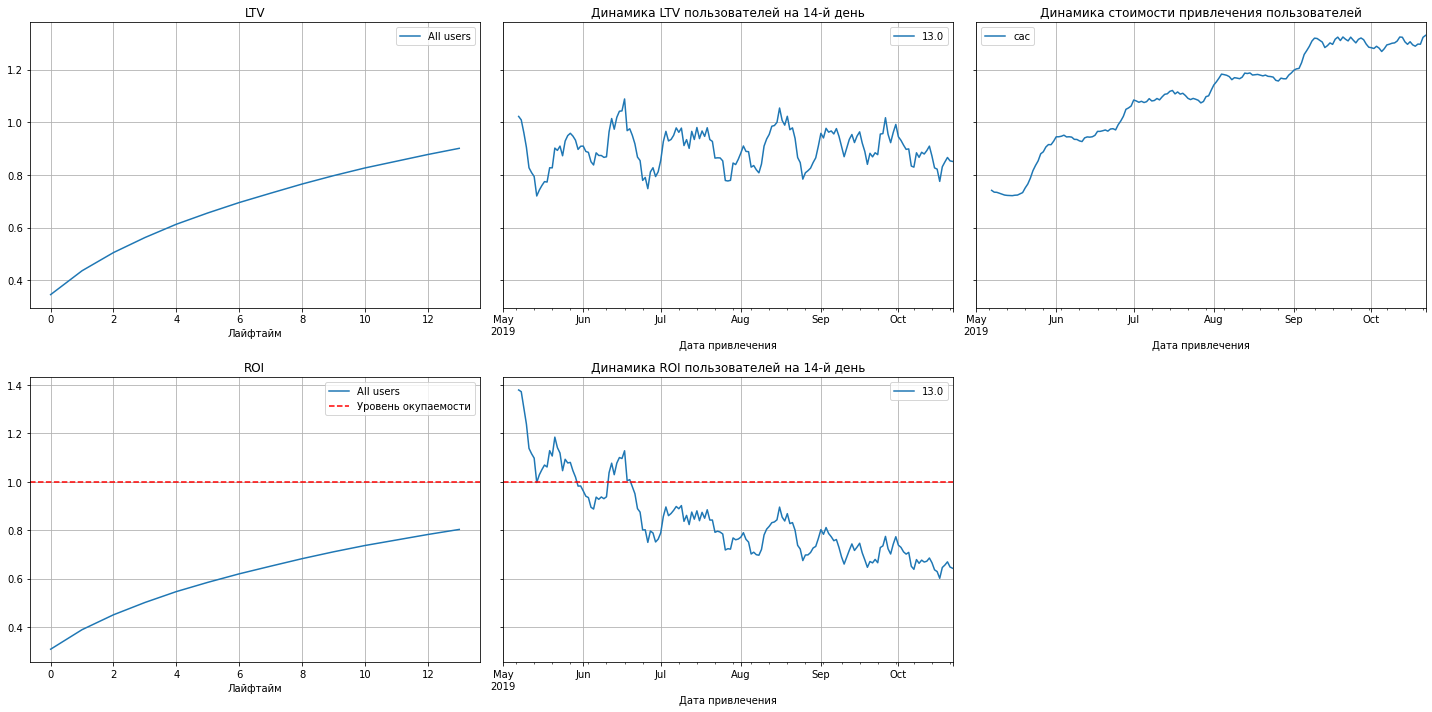

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, purchases, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**

По графикам видно, что LTV стабильно растет, ROI не превышает уровень окупаемости и по динамике на 14 день со временем падает.

Также видим стабильный рост CAC.

#### Конверсия и Удержание пользователей

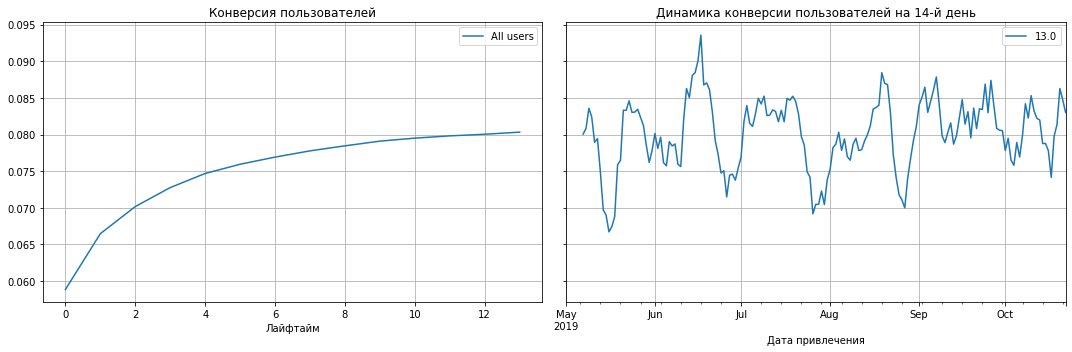

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, purchases, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

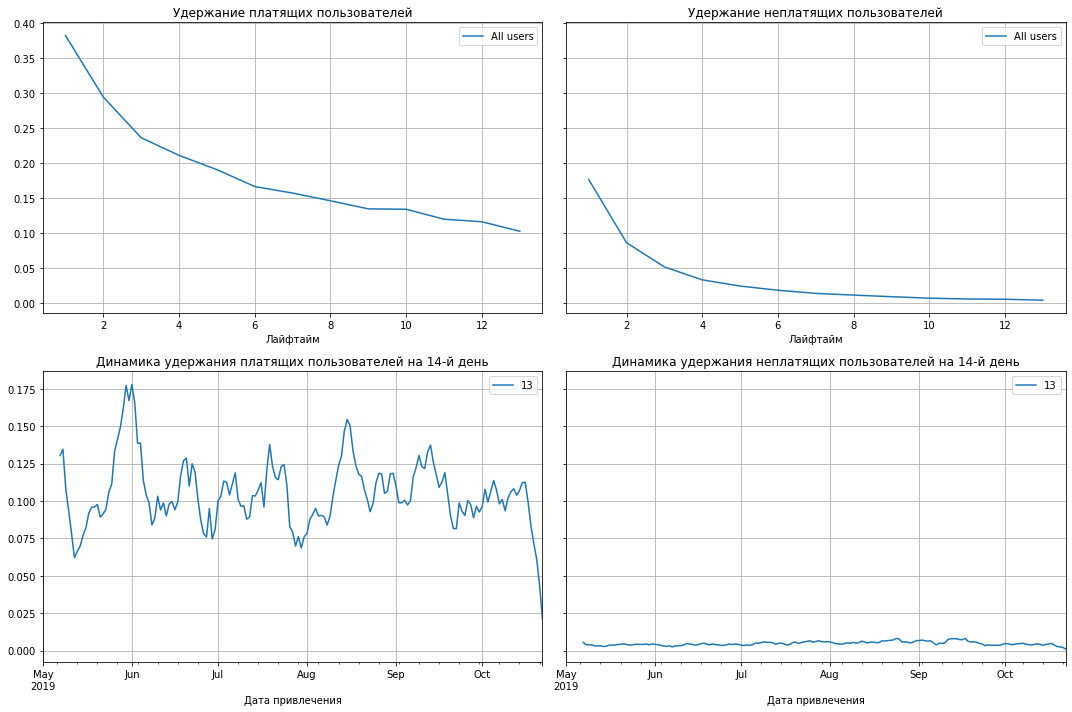

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

* Падение конверсии не наблюдается.

* Удержание платящих пользователей на уровне 13%
    * Удержание неплатящих пользователей на уровне ближе к 1%

#### Окупаемость рекламы по устройствам

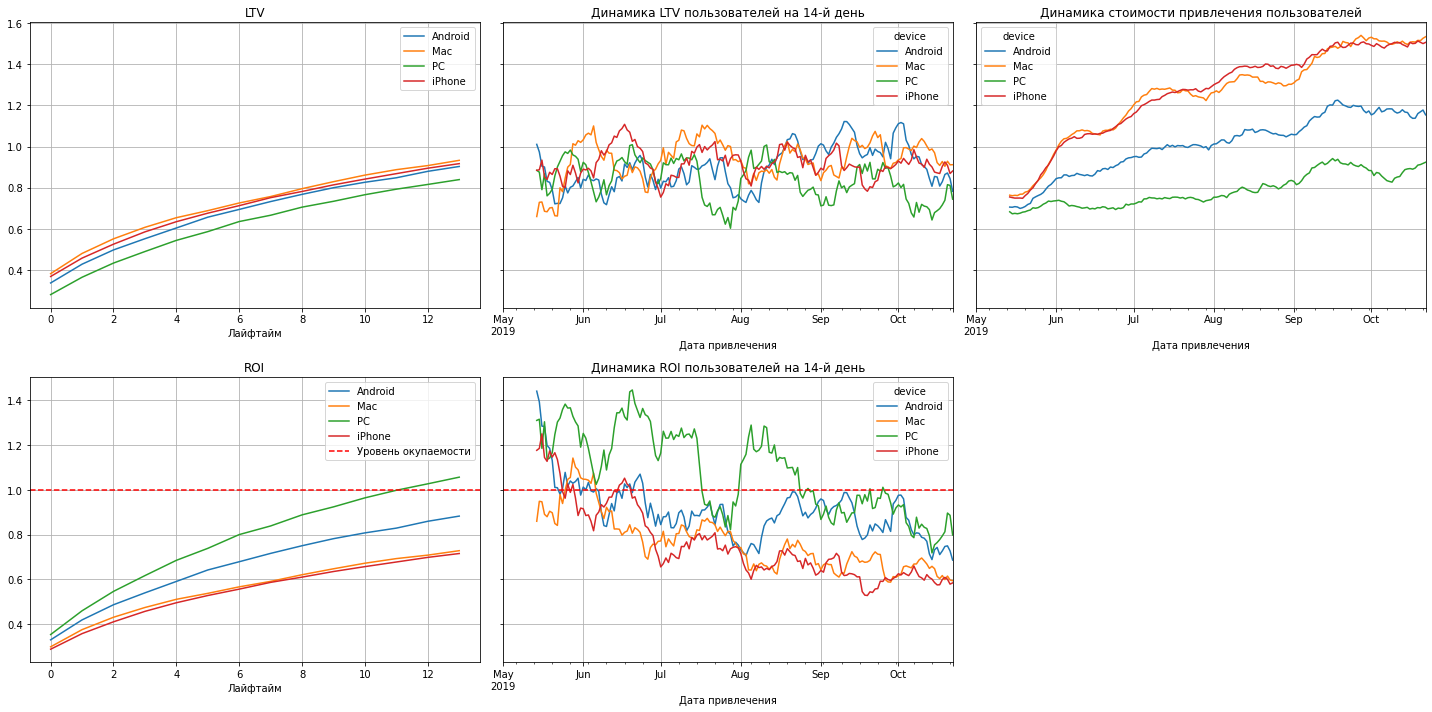

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:**

* Пользователи использующие Mac и iPhone имеют больший лайфтайм, чем пользователи на PC или Android.
    * Стоит также учитывать, что затраты на их привлечение тоже больше.
    
* ROI Pc и Adroid, показывает нам, что пользователи этих плтаформ окупаются, нежели пользователи на Mac и iPhone

#### Окупаемость рекламы по регионам

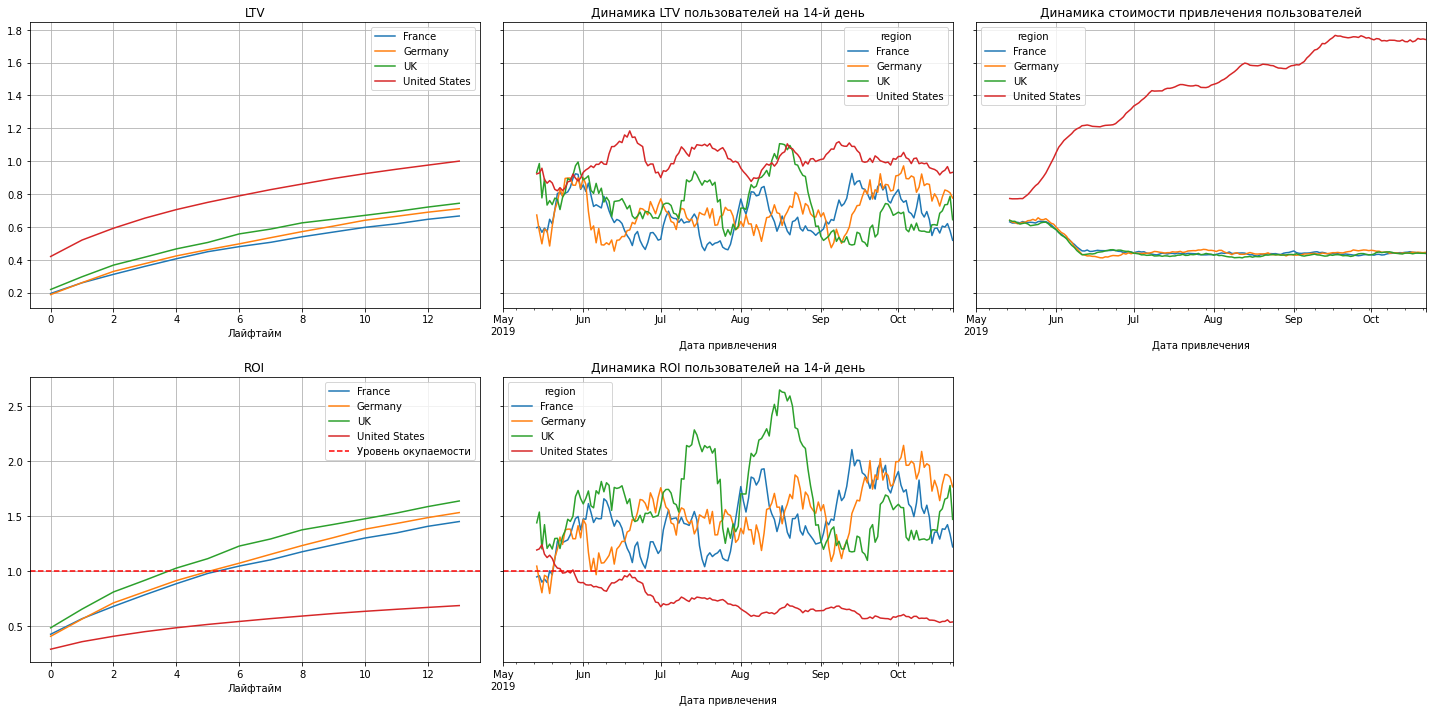

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:**

* Наибольших лайфтайм у пользователей из США.
    * На них и был сделан акцент, затраты на привлечение пользователей из США больше в несколько раз.
    * По графику Roi видно, что такие затраты не окупаются.
    
* Пользователи из Франции, Германии и Великобритании окупаются и имеют примерно одинаковый лайфтайм.

#### Окупаемость рекламы по источникам

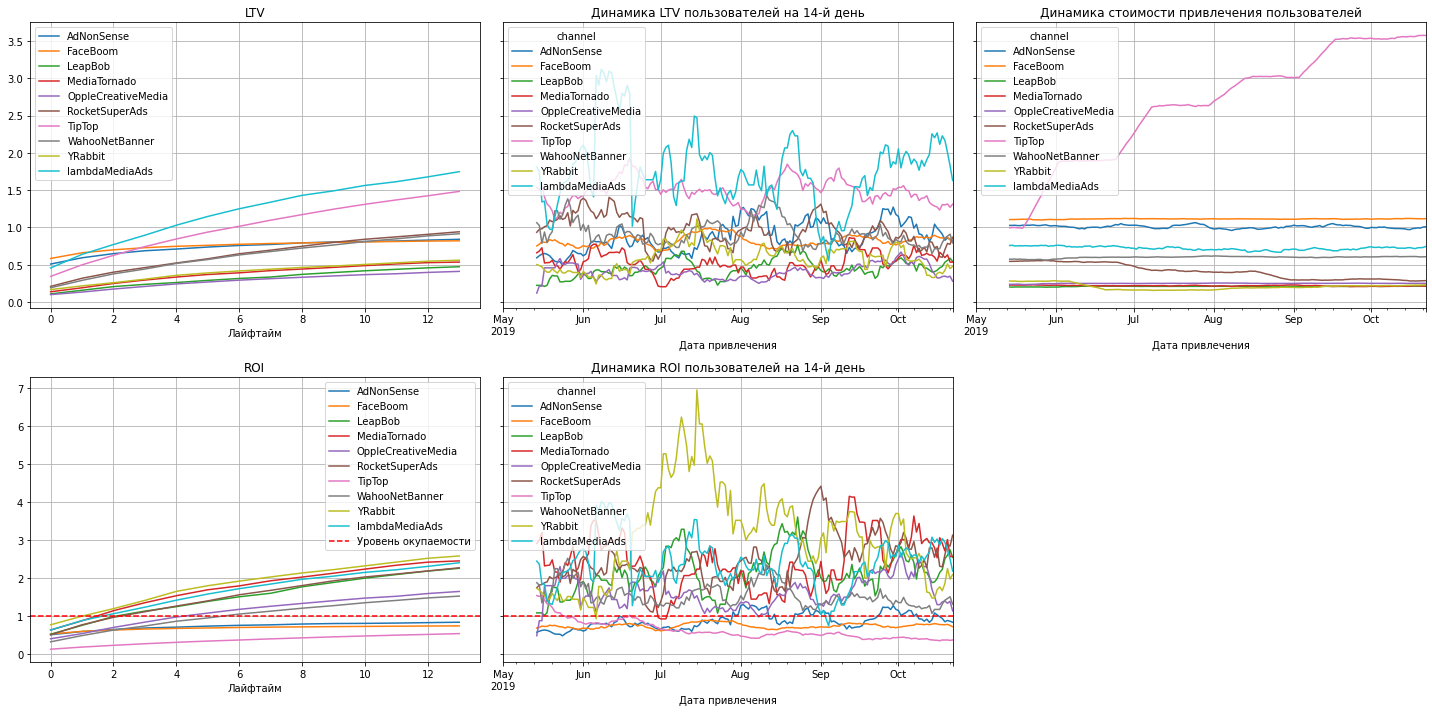

In [46]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:**

* Лучший лайфтайм у пользователей привлеченных через TipTop и lambdaMediaAds.
    * Стоит учесть, что на привлечение пользователей TipTop было выделено больше бюджет, чем lambdaMediaAds, однако lambdaMediaAds показала результаты лучше.
    
* Из лидеров не окупается реклама TipTop, FaceBoom и AdNonSense.
    * В будущем стоит сделать акцент на lambdaMediaAds, MediaTornado и  YRabbit 165, RocketSuperAds

#### Конверсия и удержание пользователей с разбивкой по каналам

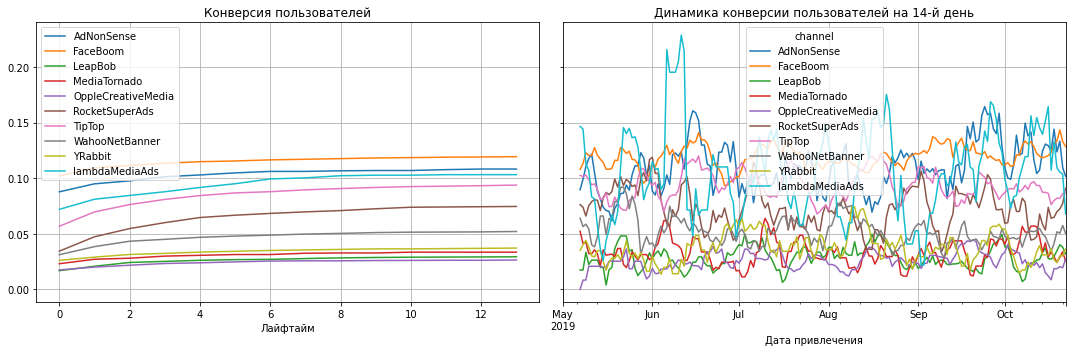

In [47]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

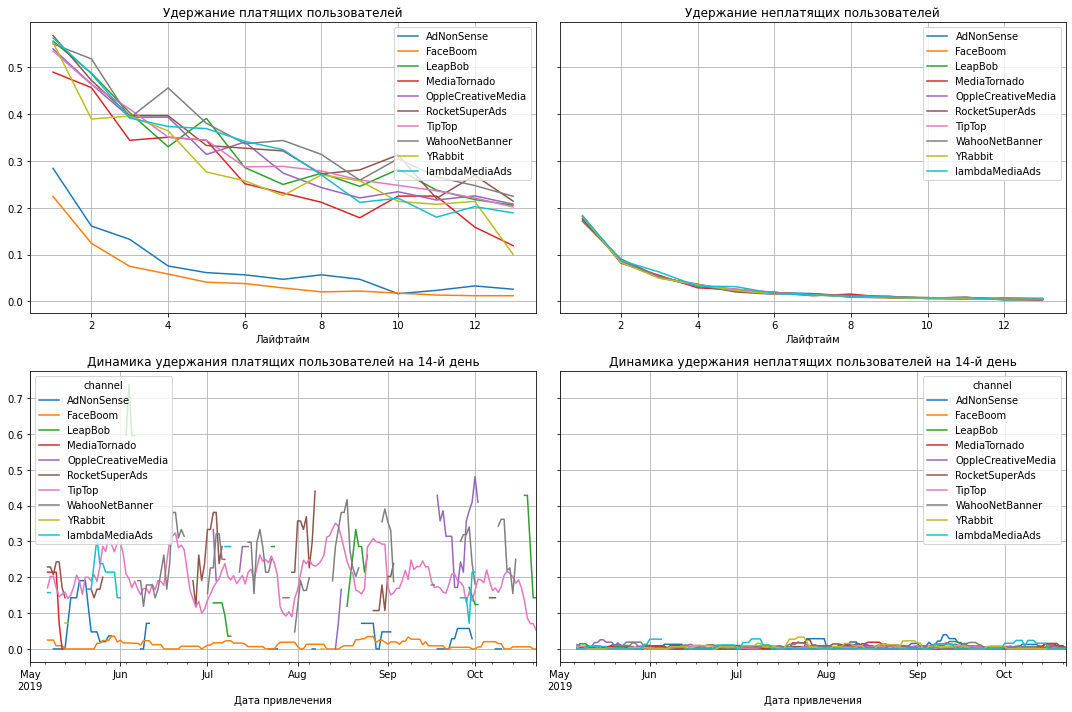

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 
Судя по графикам источники FaceBoom и AdNonSense имеют очень высокую конверсию, но в итоге являются наименее окупаемыми источниками привлечения. Исходя из графиков удержания, мы можем подтвердить, почему данные источники не окупаются, потому что у них самое малое удержание, пользователи быстро уходят.

#### Конверсия и удержание пользователей с разбивкой по странам

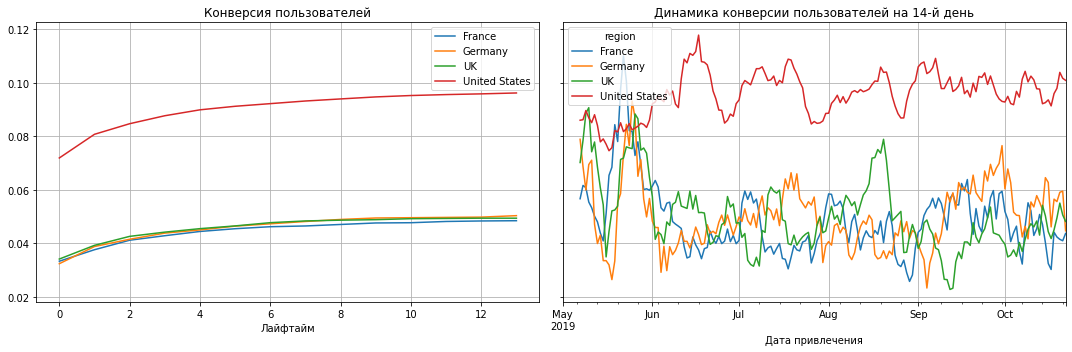

In [49]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

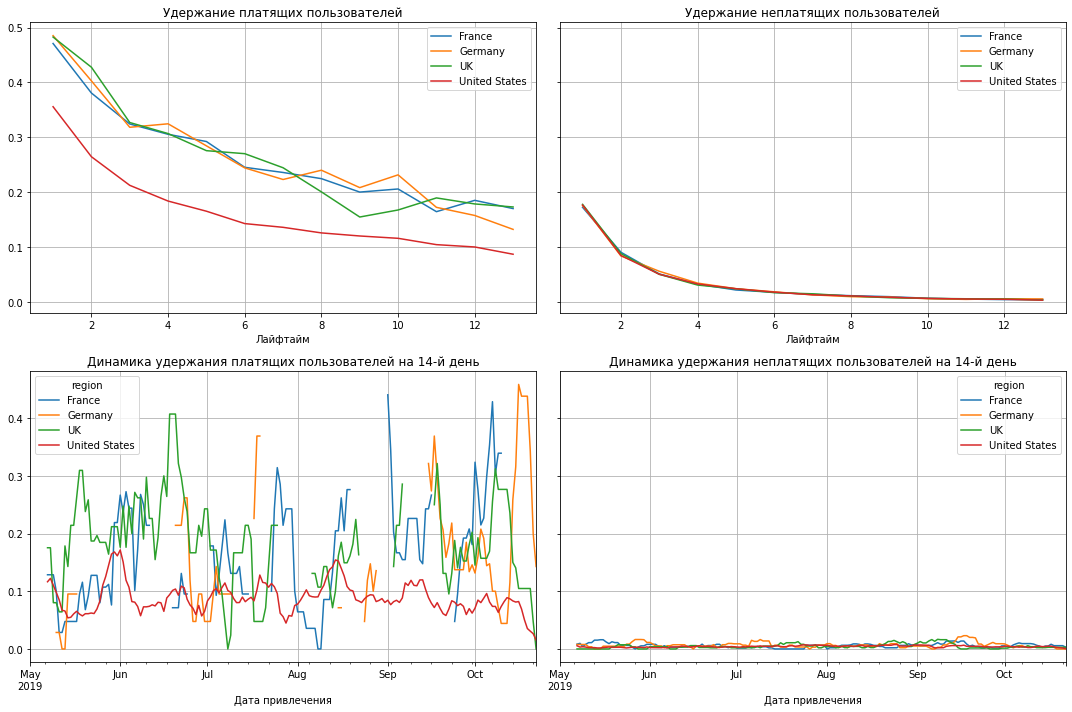

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Причина плохой окупаемости пользователей из США найдена, такая же проблема как и у источников FaceBoom и AdNonSense.
Конверсия лучшая, благодаря кол-во затрат на привлечение, но удержание самое слабое.

#### Конверсия и удержание пользователей с разбивкой по девайсам

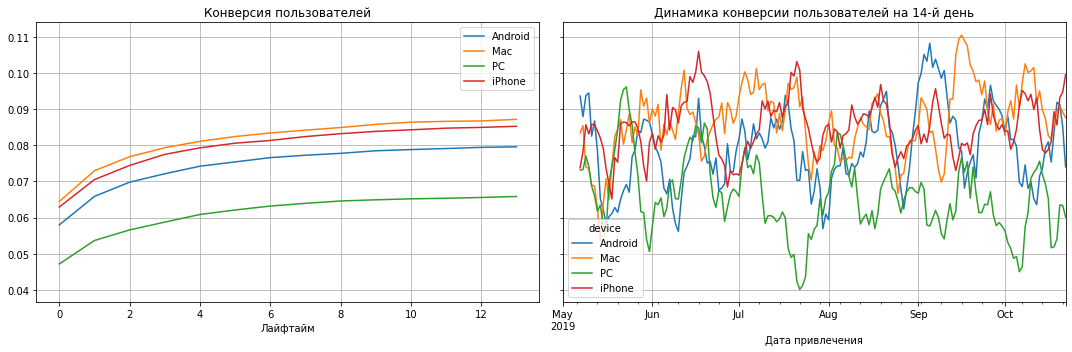

In [51]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, purchases, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

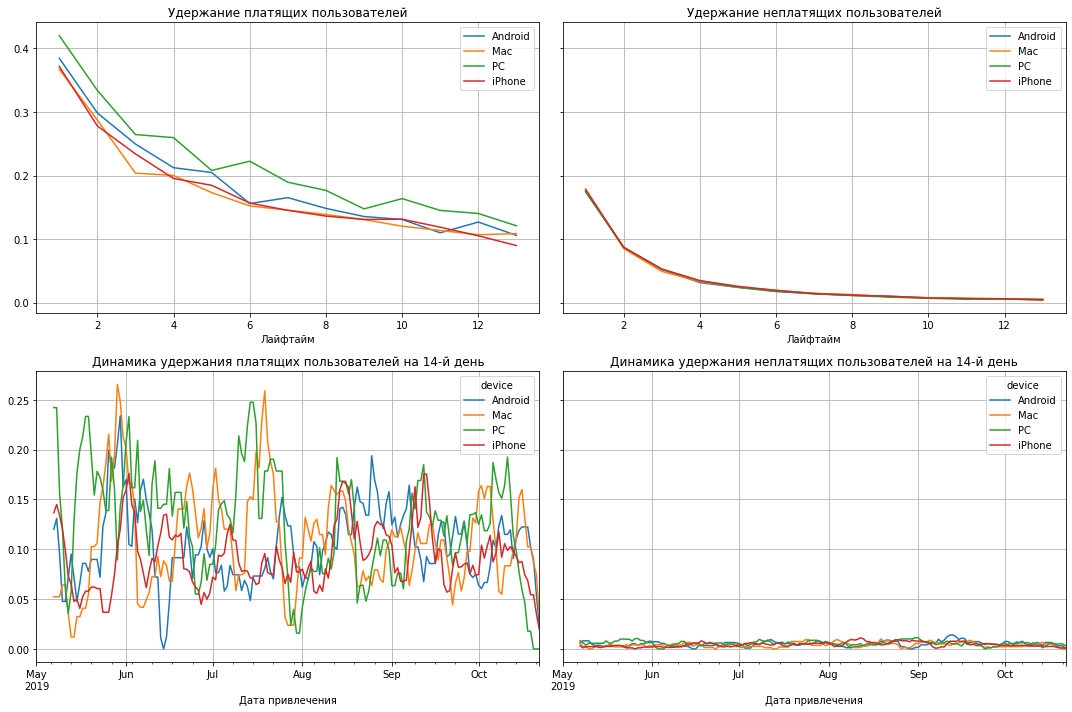

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 

По конверсии явно отстает от все платформа PC, но она обладает лучшим удержанием пользоваетелей, возможно хорошим решением будет направить средства на большее привлечение пользователей PC.

**Вывод по шагу 5:**

* Из графиков можно сказать, что окупаемость в среднем падает из-за больших затрат на конкретные каналы привлечения.

* США является единственной страной, которая не окупается, опять же из-за колосальных затрат на привлечение.

* Пользователи PC являются и Android окупаются, нежели пользователи Mac и iPhone.

* Источники TipTop, FaceBoom и AdNonSense являются убыточными.

* Выявлены главные проблемы окупаемости рекламы - это плохое удержание самых затратных рычагов в виде источников TipTop, FaceBoom и AdNonSense, и пользователей из США.
    * Для их решения нужно провести определенные действия или кампании для повышения удержания пользователей, рекомендуется выбрать уже имеющиеся источники с хорошей конверсией для пользователей из США.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Общий вывод

Были проанализированы данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года в приложении Procrastinate Pro+ .

Данные были обработаны и на их основе был создан профиль пользователей по 4 региона (США,Франция,Германия,Великобритания):

1) Статистика пользователей:
    
    *  США - 100'002; Доля платящих 6.9%

    *  Франция 17'450 пользователей; Доля платящих 3.8%

    *  Германия 14'981 пользователей; Доля платящих 4.11%

    *  Великобритания 17'575 пользователей; Доля платящих 3.98%
    
США лидирует по количеству как платящих так и пользующихся приложением бесплатно пользователей.
    
2) Маркетинг:
    
    * Суммарно расходы на рекламу составили ~105 тысяч, где 50.9% расходы на TipTop и 30.75% на FaceBoom

    * Все источники на которые было потрачено больше всего средств для привлечения пользователей оказались не окупаемыми.
        * TipTop является самым затратным источником, FaceBoom и AdNonSense тоже показали плохие результаты.
            * Причинами таковых результатов является плохое удержание пользователей из этих источников.
    * В итоге маркетинговая стратегия оказалась не окупаема, так как в случае TipTop расходы оказались необоснованы, а FaceBoom и AdNonSense показали очень плохое удержание пользователей, это можно исправить эффективными стратегиями по удержанию пользователей.
    
    
    
3) Рекомендации:

    * Нужно пересмотреть распределение средств на источники привлечения пользователей.
    
    * Пользователей из США больше всего, отказываться от них плохая идея, лучше будет также рассмотреть несколько механизмов удержания пользователей.
     
    * Рекомендуемы источники: 
        * lambdaMediaAds (привлек меньше всего клиентов, при этом 10% оказались платящими, также имеет хорошую конверсию и удержание)
        
        * FaceBoom и AdNonSense, если сделать эффективную стратегию удержания пользователей.
        
        * RocketSuperAds при привлечении примерно 4500 тысяч пользователей ~8% оказались платящами, имеет хорошую конверсию и удержание, несмотря на то, что затраты на этот источник были минимальными.
        
    * Расходы на рекламу для пользователей mac, iphone и android можно немного снизить и направить эти средства, на рекламу и удержание пользователей PC.
        
        
       